## Prediction Using Unsupervised ML

### Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [2]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data=data.drop("Id",axis=1)

In [4]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization

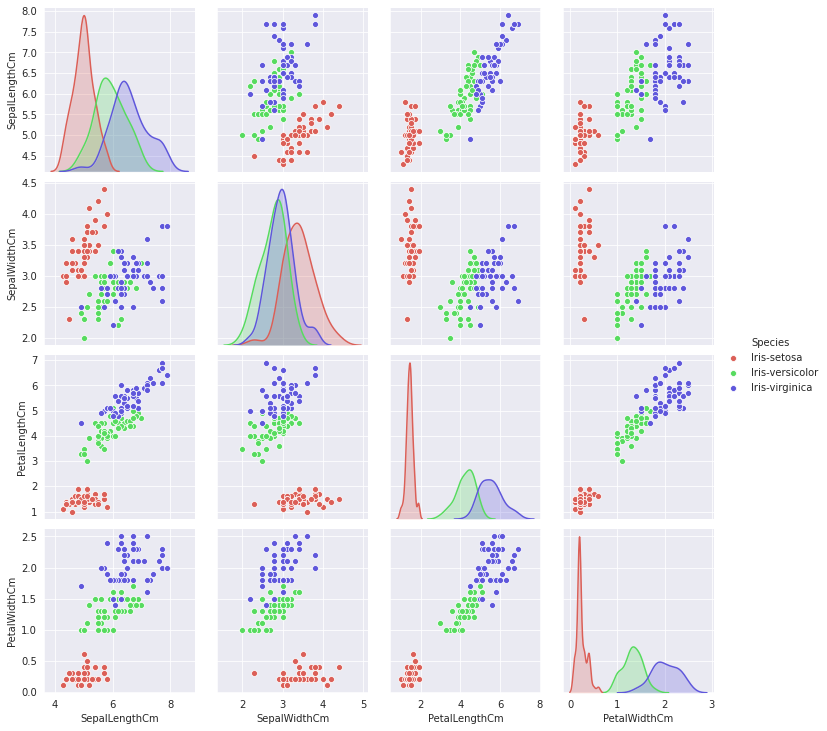

In [5]:
sns.set_style("darkgrid")
sns.pairplot(data,hue='Species',palette='hls');

In [6]:
X=data.drop(["Species"],axis=1)

In [7]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Finding optimum number of clusters for K Means

k: 1 wcss:  680.8243999999996
k: 2 wcss:  152.36870647733915
k: 3 wcss:  78.94084142614601
k: 4 wcss:  57.34540931571815
k: 5 wcss:  46.535582051282034
k: 6 wcss:  38.93873974358975
k: 7 wcss:  34.190687924796634
k: 8 wcss:  29.90537429982511
k: 9 wcss:  27.927882157034986


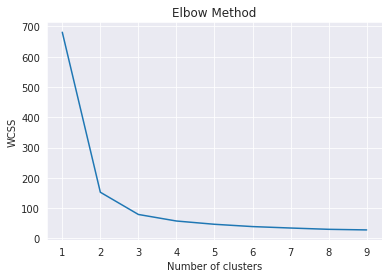

In [8]:
from sklearn.cluster import KMeans
X=data.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss: ",kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### Let's take 3 as the number of clusters 
## Applying KMeans to the dataset

In [9]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

#### Predicted values

In [10]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

#### Plotting the clusters - On the first two columns

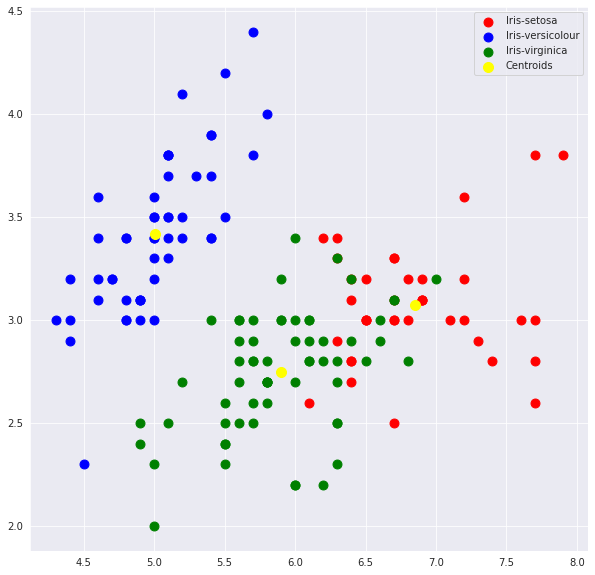

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c='blue',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend();